# Model Selection - Summary

| Regression Model         | Pros                                             | Cons                                                     |
|--------------------------|--------------------------------------------------|----------------------------------------------------------|
| Linear Regression        | Works on any size of dataset, gives information about relevance of features | The Linear Regression Assumptions                          |
| Polynomial Regression    | Works on any size of dataset, works very well on non-linear problems | Need to choose the right polynomial degree for a good bias/variance tradeoff |
| SVR                      | Easily adaptable, works very well on non-linear problems, not biased by outliers | Compulsory to apply feature scaling, not well known, more difficult to understand |
| Decision Tree Regression | Interpretability, no need for feature scaling, works on both linear/nonlinear problems | Poor results on too small datasets, overfitting can easily occur |
| Random Forest Regression | Powerful and accurate, good performance on many problems, including non-linear | No interpretability, overfitting can easily occur, need to choose the number of trees |


In [7]:
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv('../filez/Data.csv')
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


dataset:
- `AT`: Ambient Temperature
- `V`: Exhaust Vacuum
- `AP`: Ambient Pressure
- `RH`: Relative Humidity
- `PE`: Energy Output

In [10]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### Exploratory Data Analysis

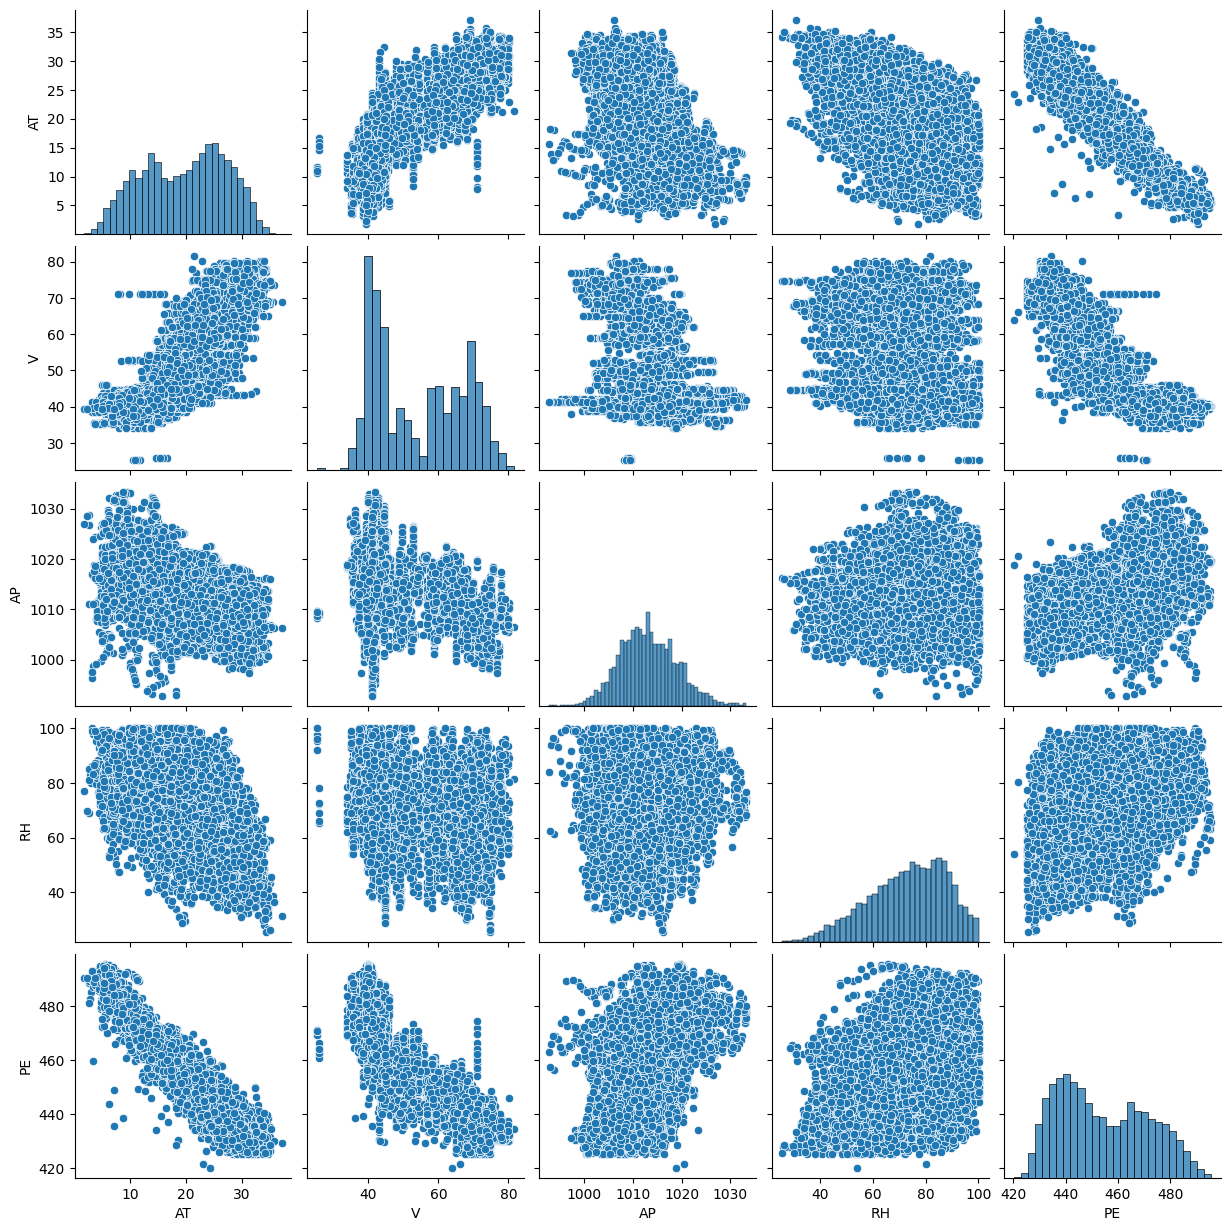

In [9]:
sns.pairplot(data=df)

#### Pairplot conclusions:

1. **Correlations**:
   - There appears to be a fairly strong inverse relationship between `AT` (Ambient Temperature) and `PE` (Energy Output), indicated by a downward trend in their scatter plot. As `AT` increases, `PE` seems to decrease.
   - Similarly, `V` (Exhaust Vacuum) also shows a strong inverse relationship with `PE`.
   - `AP` (Ambient Pressure) and `RH` (Relative Humidity) do not show a clear linear relationship with `PE`.

2. **Distributions**:
   - The diagonal histograms show the distribution of each variable. `AT`, `V`, and `PE` seem to have relatively normal (Gaussian) distributions, whereas `AP` and `RH` exhibit a more complex distribution that might not be normally distributed.

3. **Feature Relationships**:
   - Apart from the relationship with `PE`, other features (`AT`, `V`, `AP`, and `RH`) do not show a clear or strong linear relationship with each other, as seen in the scatter plots where no distinct patterns are easily discernible.

4. **Potential Model Fit**:
   - Given the observed relationships, a model that can capture the non-linear relationships, like polynomial regression or a more advanced algorithm like Random Forest or Gradient Boosting, might be appropriate for predicting `PE`.
   - Linear regression might not fully capture the complexity of the data, especially considering the relationships involving `AP` and `RH`.

5. **Outliers**:
   - There do not appear to be many obvious outliers, especially with respect to the `PE` variable, which suggests that robustness to outliers may not be a primary concern for model selection.

6. **Variability**:
   - The spread of points in the scatter plots indicates variability in the relationships, suggesting that while some features have a clear trend with `PE`, others may require more complex modeling to capture any predictive power they might have.

7. **Non-Linearity**:
   - The non-linear patterns, particularly visible in the scatter plots of `AT` vs. `PE` and `V` vs. `PE`, suggest that a non-linear model may be more suitable for this dataset.

In conclusion, while linear regression could be tried as a baseline model, the relationships in the data suggest that exploring non-linear models could yield better predictive performance. The exact choice of model would benefit from further statistical testing, feature engineering, and hyperparameter tuning.

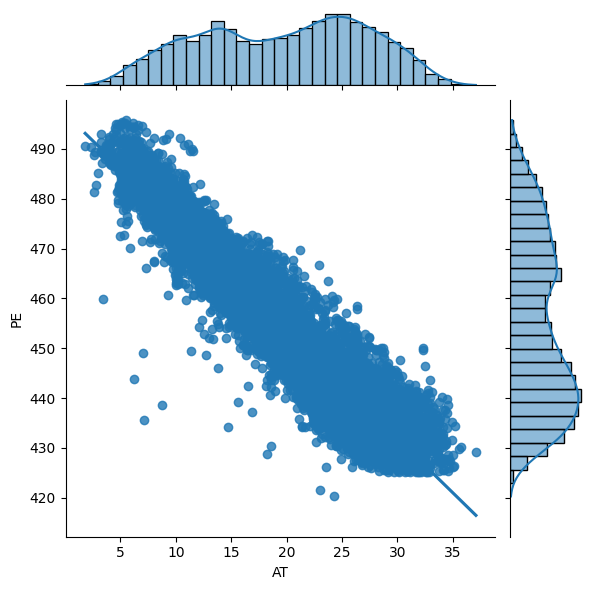

In [13]:
"""
Inverse relationship between `AT` (Ambient Temperature) and `PE` (Energy Output),
indicated by a downward trend in their scatter plot. As `AT` increases, `PE` seems to decrease
"""
sns.jointplot(x="AT", y="PE", data=df, kind="reg")

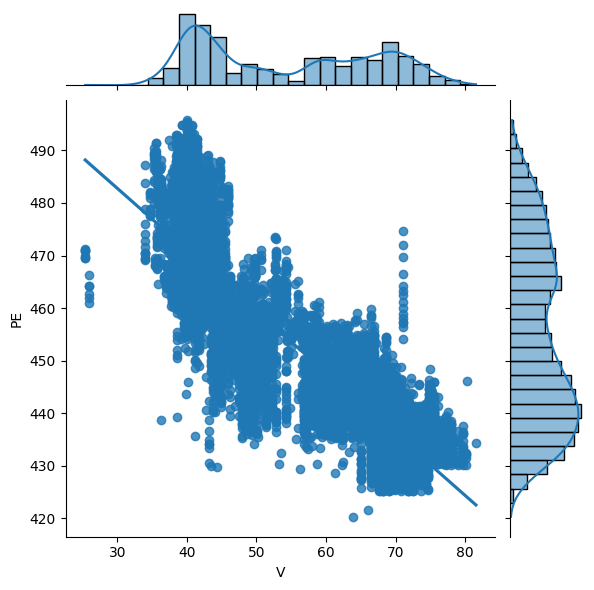

In [16]:
"""
`V` (Exhaust Vacuum) also shows a inverse relationship with `PE`
"""
sns.jointplot(x="V", y="PE", data=df, kind="reg")

**$R^2$ score** results (ordered by better performance):

| Method    | $R^2$ score |
|--------------------------|--------------------------------------------------|
| Random Forest Regression    | 0.9615  |
| Support Vector Regression    | 0.9480  |
| Polynomial Regression (n=4)   | 0.9458  |
| Multiple Linear Regression    | 0.9325  |
| Decision Tree Regression    | 0.9229  |

